In [1]:
from general import *
from exp2 import *
import time
import copy
import multiprocessing as mp

random_state=42
np.random.seed(random_state)
cpu=mp.cpu_count() 
cpu

8

## Experiment 

In [2]:
labels = ['California','Illinois','Missouri','Texas']
alpha=.1
loss='mse'
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
B=100
n_vals=20
iterations=48
percent=False

In [3]:
%%time
pool = mp.Pool(cpu)
out = pool.starmap(exp22, [(it, n_vals, loss, alpha, B, percent) for it in range(iterations)])
pool.close()                 

CPU times: user 514 ms, sys: 324 ms, total: 838 ms
Wall time: 11min 16s


In [4]:
times = np.array([o[1] for o in out])[:,:,1:].mean(axis=0).mean(axis=0)
results = np.array([o[0] for o in out])
print("Running time (ms). rbpt: {:.1f}; rbpt2: {:.1f}; stfr: {:.1f}; gcm: {:.1f}; crt: {:.1f}; cpt: {:.1f}".format(1e3*times[0],1e3*times[1],1e3*times[2],1e3*times[3],1e3*times[4],1e3*times[5]))

Running time (ms). rbpt: 96.4; rbpt2: 244.7; stfr: 0.6; gcm: 0.6; crt: 23.9; cpt: 695.1


In [6]:
reject_prop = np.array(results).mean(axis=0) 
reject_rbpt = reject_prop[:,0]
reject_rbpt2 = reject_prop[:,1]
reject_stfr = reject_prop[:,2]
reject_gcm = reject_prop[:,3]
reject_crt = reject_prop[:,4]
reject_cpt = reject_prop[:,5]

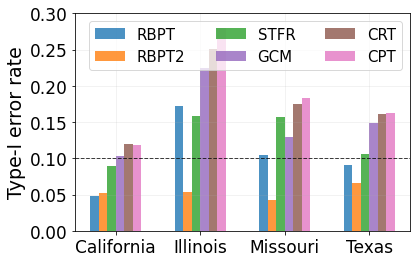

In [18]:
x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

rects1 = plt.bar(x - width*5/8, reject_rbpt, width*2/8, label='RBPT', color=colors[0], alpha=.8)
rects2 = plt.bar(x - width*3/8, reject_rbpt2, width*2/8, label='RBPT2', color=colors[1], alpha=.8)
rects3 = plt.bar(x - width*1/8, reject_stfr, width*2/8, label='STFR', color=colors[2], alpha=.8)
rects5 = plt.bar(x + width*1/8, reject_gcm, width*2/8, label='GCM', color=colors[4], alpha=.8)
rects6 = plt.bar(x + width*3/8, reject_crt, width*2/8, label='CRT', color=colors[5], alpha=.8)
rects7 = plt.bar(x + width*5/8, reject_cpt, width*2/8, label='CPT', color=colors[6], alpha=.8)


# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Type-I error rate', size=19)
plt.xticks(x, labels, fontsize=17)
plt.legend(framealpha=0.75, prop={'size': 15}, ncol=3) 
plt.axhline(y=alpha, color='black', linestyle='--', lw=1, alpha=.75)
plt.yticks(fontsize=17)
plt.ylim(0,.3)
plt.grid(alpha=.2)

plt.savefig('plots/exp22_{:}_{:}.png'.format(loss,percent), bbox_inches='tight', dpi=300, transparent=True)
plt.show()